In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [7]:
# --- STEP 1: LOAD & CLEAN DATA ---

try:
    df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
except:
    df = pd.read_csv('Sample - Superstore.csv', encoding='cp1252')

# Convert Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort by date
df = df.sort_values('Order Date')

# EXPORT 1: Save cleaned historical data for Power BI (This allows filtering by Region/Category later)
df.to_csv('cleaned_data.csv', index=False)
print("File 1 Saved: 'cleaned_data.csv' (Use this for historical analysis in Power BI)")

File 1 Saved: 'cleaned_data.csv' (Use this for historical analysis in Power BI)


In [8]:
# --- STEP 2: PREPARE DATA FOR AI MODEL ---

monthly_sales = df.set_index('Order Date')['Sales'].resample('MS').sum().reset_index()

# Rename columns for Prophet (it requires 'ds' and 'y')
prophet_df = monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

In [10]:
# --- STEP 3: TRAIN THE MODEL ---

print("Training the AI model... (This might take a moment)")
model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False)
model.fit(prophet_df)

23:01:17 - cmdstanpy - INFO - Chain [1] start processing


Training the AI model... (This might take a moment)


23:01:17 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# --- STEP 4: MAKE PREDICTIONS ---

future = model.make_future_dataframe(periods=12, freq='MS') 
forecast = model.predict(future)

In [13]:
# --- STEP 5: EXPORT FORECAST DATA ---

forecast_clean = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_clean = forecast_clean.rename(columns={
    'ds': 'Date', 
    'yhat': 'Predicted Sales',
    'yhat_lower': 'Lower Confidence Interval',
    'yhat_upper': 'Upper Confidence Interval'
})

# Save to CSV
forecast_clean.to_csv('forecast_data.csv', index=False)
print("File 2 Saved: 'forecast_data.csv' (Use this for the forecast line in Power BI)")

File 2 Saved: 'forecast_data.csv' (Use this for the forecast line in Power BI)


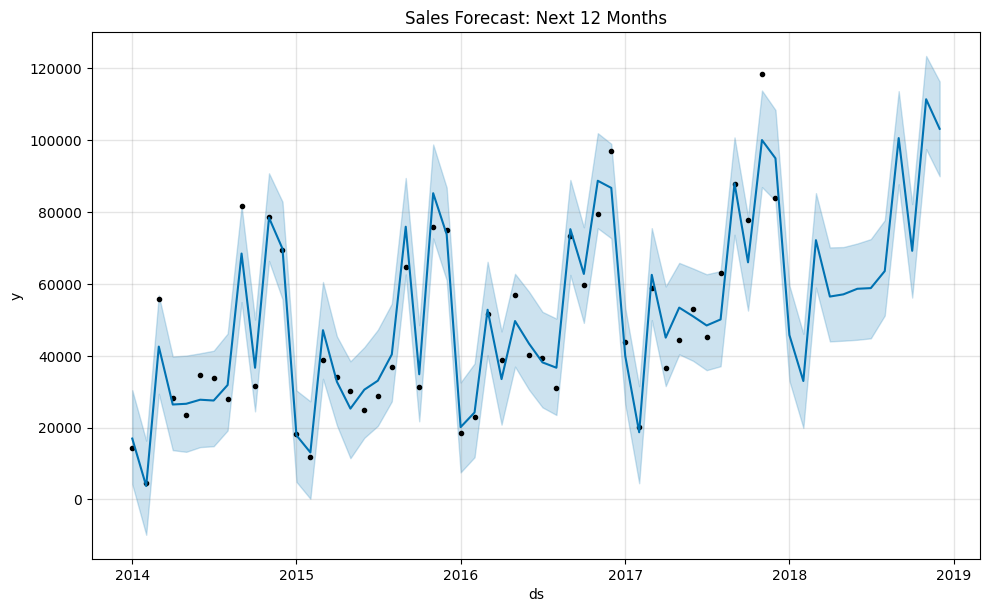

In [14]:
model.plot(forecast)
plt.title("Sales Forecast: Next 12 Months")
plt.show()